# Alternative Approach to Removing/Imputing Values

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import psycopg2
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
users = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/users_clean.csv')

In [4]:
# Rename RESPID column to "User"
users = users.rename(columns = {'RESPID': 'User'})
users = users.ix[:,1:]

In [5]:
users.describe()

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,User,AGE,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,48645.000000,48178.000000,42706.000000,42820.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,...,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,42210.000000,48645.000000,35520.000000,35520.000000
mean,25562.400391,39.277180,0.926872,1.094979,49.113570,54.624422,51.284449,37.309125,34.585430,39.333615,...,55.011029,58.636433,53.665898,46.962657,53.446437,39.664562,35.579258,53.826288,42.232447,41.362631
std,15033.356108,15.955373,0.809391,0.924138,27.545252,23.770780,26.487641,23.598351,23.234577,25.744281,...,25.486398,23.837543,25.389724,26.664165,25.795551,26.061055,25.374290,25.891354,25.680349,26.455730
min,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12161.000000,NaN,NaN,NaN,28.000000,44.000000,31.000000,14.000000,12.000000,14.000000,...,41.000000,48.000000,36.000000,28.000000,33.000000,13.000000,NaN,35.000000,NaN,NaN
50%,26605.000000,NaN,NaN,NaN,51.000000,53.000000,52.000000,34.000000,32.000000,35.000000,...,53.000000,64.000000,54.000000,50.000000,53.000000,37.000000,NaN,56.000000,NaN,NaN
75%,38766.000000,NaN,NaN,NaN,70.000000,71.000000,71.000000,52.000000,51.000000,53.000000,...,72.000000,73.000000,71.000000,68.000000,71.000000,56.000000,NaN,71.000000,NaN,NaN
max,50927.000000,94.000000,5.000000,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
words = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/words.csv')

In [7]:
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN


In [8]:
train = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/train.csv')

In [9]:
train.head()

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [10]:
train.describe()

,Artist,Track,User,Rating,Time
count,188690.000000,188690.000000,188690.000000,188690.000000,188690.000000
mean,22.207753,86.516191,26478.842106,36.435391,15.660671
std,14.485397,56.017025,13632.273985,22.586036,6.441050
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,36.000000,17711.000000,15.000000,12.000000
50%,22.000000,80.000000,27831.000000,32.000000,17.000000
75%,35.000000,142.000000,35949.000000,50.000000,21.000000
max,49.000000,183.000000,50927.000000,100.000000,23.000000


In [11]:
train_words = train.merge(words, how='left', on=['User','Artist'])
train_words_users = train_words.merge(users, how='left', on='User')

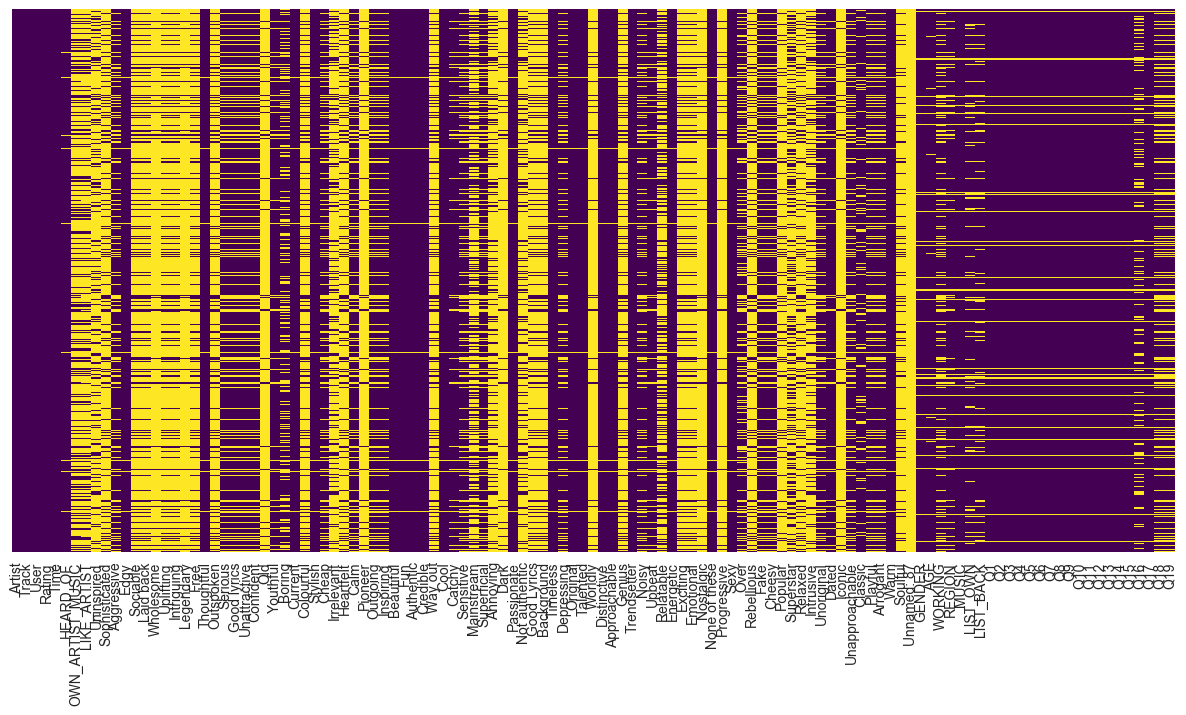

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(train_words_users.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [13]:
train_words_users.shape

(188690, 117)

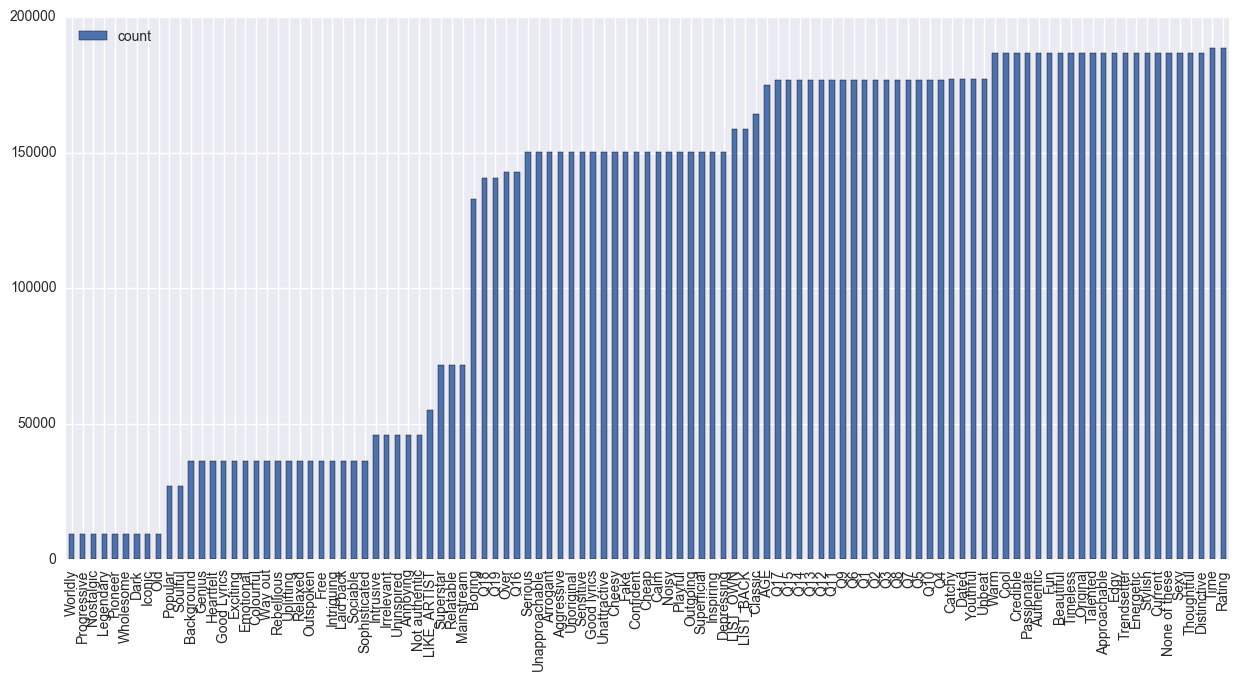

In [14]:
# Find value counts of non-null data
data_counts = train_words_users.describe().iloc[0:1,3:].T.sort_values('count').iloc[1:,:]
data_counts.plot(kind='bar', figsize=(15,7))

#### Drop features with few data points

In [15]:
data_drop = train_words_users.dropna(axis=1,thresh=100000)

Features lost...

In [16]:
print 'Features lost: {}'.format(train_words_users.shape[1] - data_drop.shape[1])

Features lost: 39


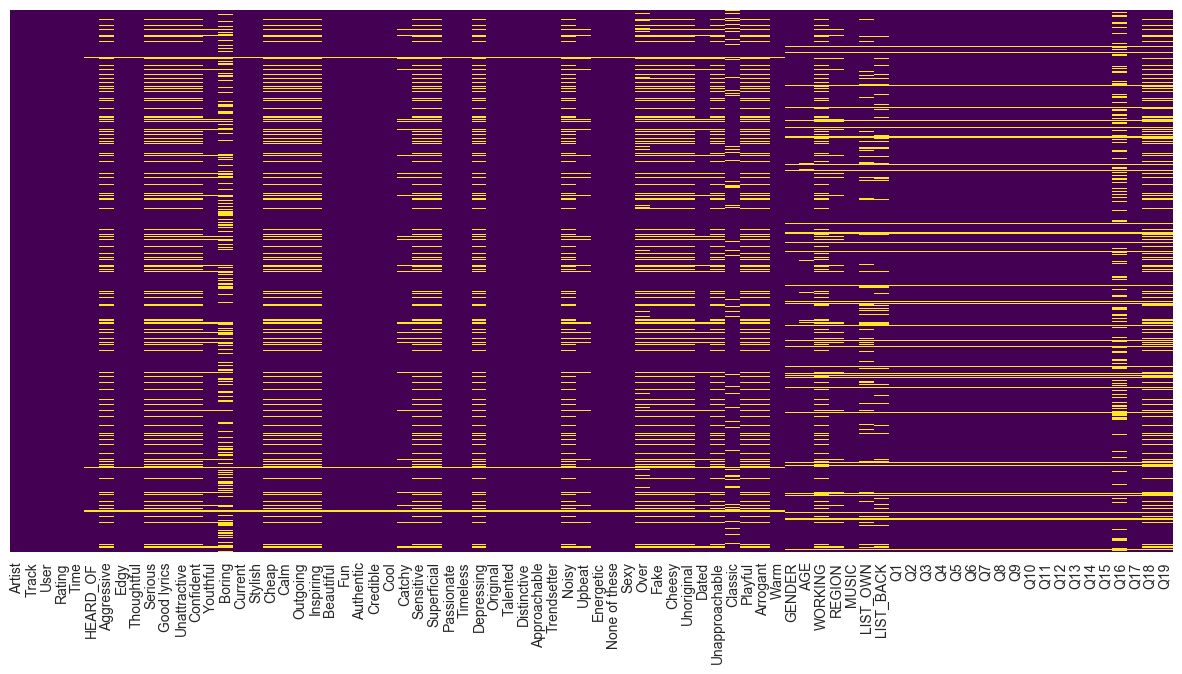

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(data_drop.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Create dummy variables, normalize data


In [18]:
def region_cleaner(x):
    if x == 'North Ireland':
        return 'Northern Ireland'
    else:
        return x

In [19]:
data_drop['REGION'] = data_drop['REGION'].apply(region_cleaner)

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
data_drop.columns

Index([u'Artist', u'Track', u'User', u'Rating', u'Time', u'HEARD_OF',
       u'Aggressive', u'Edgy', u'Thoughtful', u'Serious', u'Good lyrics',
       u'Unattractive', u'Confident', u'Youthful', u'Boring', u'Current',
       u'Stylish', u'Cheap', u'Calm', u'Outgoing', u'Inspiring', u'Beautiful',
       u'Fun', u'Authentic', u'Credible', u'Cool', u'Catchy', u'Sensitive',
       u'Superficial', u'Passionate', u'Timeless', u'Depressing', u'Original',
       u'Talented', u'Distinctive', u'Approachable', u'Trendsetter', u'Noisy',
       u'Upbeat', u'Energetic', u'None of these', u'Sexy', u'Over', u'Fake',
       u'Cheesy', u'Unoriginal', u'Dated', u'Unapproachable', u'Classic',
       u'Playful', u'Arrogant', u'Warm', u'GENDER', u'AGE', u'WORKING',
       u'REGION', u'MUSIC', u'LIST_OWN', u'LIST_BACK', u'Q1', u'Q2', u'Q3',
       u'Q4', u'Q5', u'Q6', u'Q7', u'Q8', u'Q9', u'Q10', u'Q11', u'Q12',
       u'Q13', u'Q14', u'Q15', u'Q16', u'Q17', u'Q18', u'Q19'],
      dtype='object')

In [21]:
# Create dummy variables
dummy_cols = ['GENDER','REGION','HEARD_OF','MUSIC','WORKING','LIST_OWN','LIST_BACK']
for i in dummy_cols:
    data_drop = pd.concat([data_drop, pd.get_dummies(data_drop[i], prefix=i, drop_first=True)],axis=1)
    data_drop = data_drop.drop(i,axis=1)


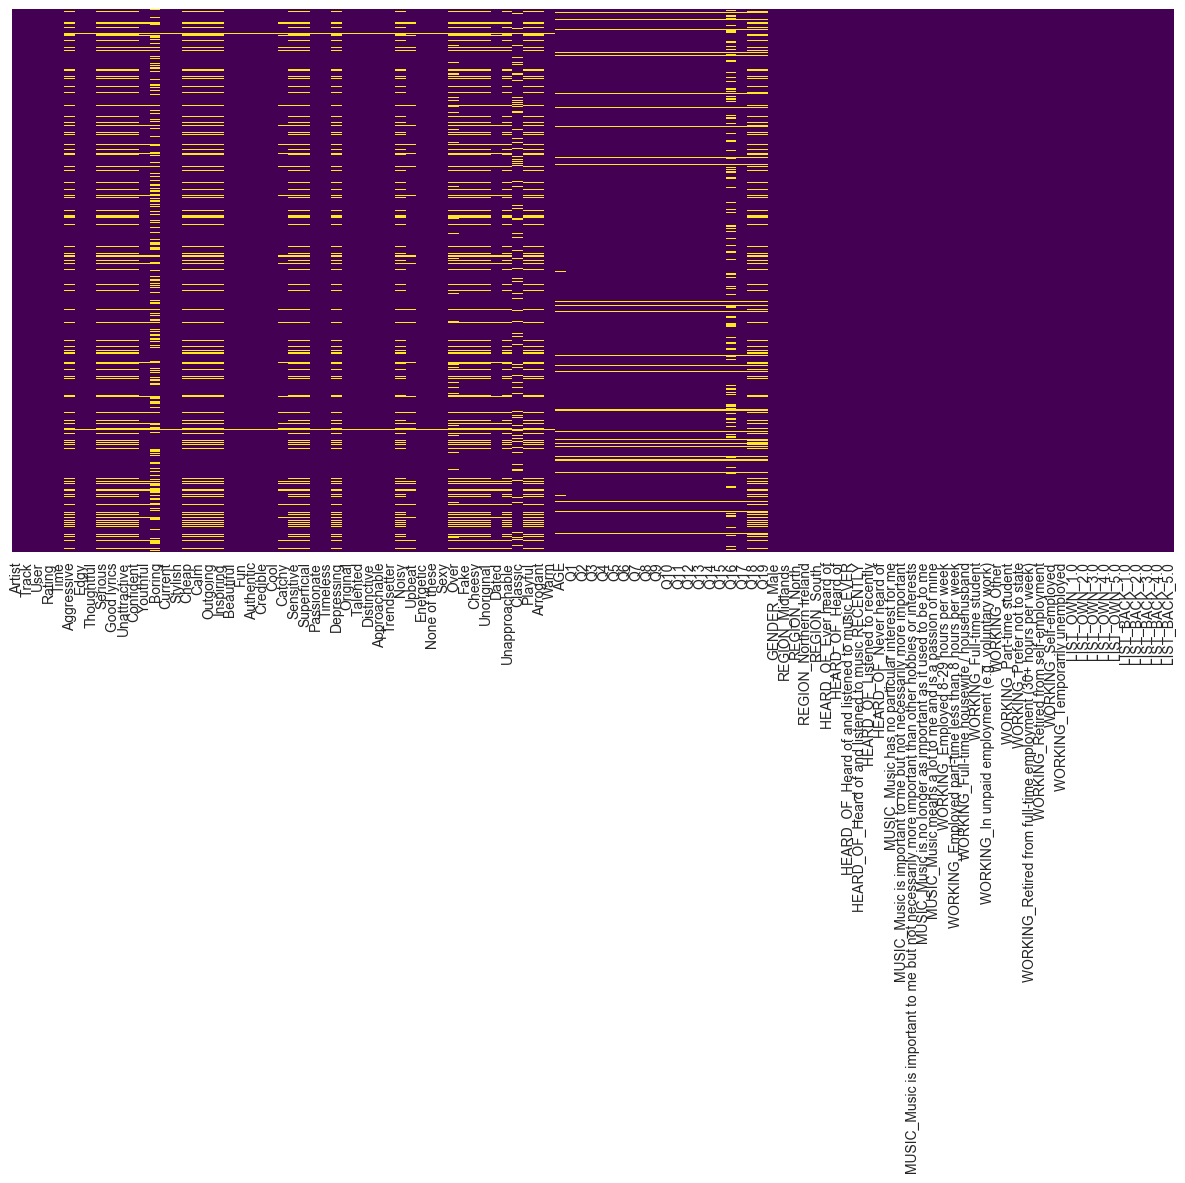

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(data_drop.isnull(),yticklabels=False, cbar=False, cmap='viridis')

# Fill in null values with mean of columns

In [23]:
mean_values = {}
for i in data_drop.columns:
    mean_values[i] = data_drop[i].mean()
mean_values

{'AGE': 39.246922540604174,
 'Aggressive': 0.04544789421874584,
 'Approachable': 0.09339034269915772,
 'Arrogant': 0.03492563918376034,
 'Artist': 22.207753458052892,
 'Authentic': 0.1336933924859084,
 'Beautiful': 0.11209520135450823,
 'Boring': 0.1834673014772907,
 'Calm': 0.1646712959267832,
 'Catchy': 0.20560795108413618,
 'Cheap': 0.03677468273605236,
 'Cheesy': 0.061976215180780586,
 'Classic': 0.11823242104237464,
 'Confident': 0.1561510628674808,
 'Cool': 0.147179536638162,
 'Credible': 0.10430463576158941,
 'Current': 0.14892625216999936,
 'Dated': 0.07592901784707023,
 'Depressing': 0.09049006305371537,
 'Distinctive': 0.2061767290340556,
 'Edgy': 0.09672303306971859,
 'Energetic': 0.12692085128271074,
 'Fake': 0.03169313858514912,
 'Fun': 0.10064510598169699,
 'GENDER_Male': 0.46609783242355185,
 'Good lyrics': 0.16523665096975018,
 'HEARD_OF_Ever heard of': 0.009576554136414225,
 'HEARD_OF_Heard of': 0.188102178175844,
 'HEARD_OF_Heard of and listened to music EVER': 0.1582

In [24]:
for i in data_drop.columns:
    data_drop[i].fillna(value=mean_values[i], inplace=True)

In [25]:
data_clean = data_drop

In [26]:
data_clean.head()

,Artist,Track,User,Rating,Time,Aggressive,Edgy,Thoughtful,Serious,Good lyrics,...,LIST_OWN_1.0,LIST_OWN_2.0,LIST_OWN_3.0,LIST_OWN_4.0,LIST_OWN_5.0,LIST_BACK_1.0,LIST_BACK_2.0,LIST_BACK_3.0,LIST_BACK_4.0,LIST_BACK_5.0
0,40,179,47994,9,17,0.000000,0.0,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,23,8575,58,7,0.045448,0.0,0.0,0.054533,0.165237,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,46,168,45475,13,16,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,153,39508,42,15,0.000000,1.0,0.0,1.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,32,11565,54,19,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
print "Shape of dataset with null values replaced with mean:"
print 
print "Rows: {}".format(data_clean.shape[0])
print "Features: {}".format(data_clean.shape[1])

Shape of dataset with null values replaced with mean:

Rows: 188690
Features: 109


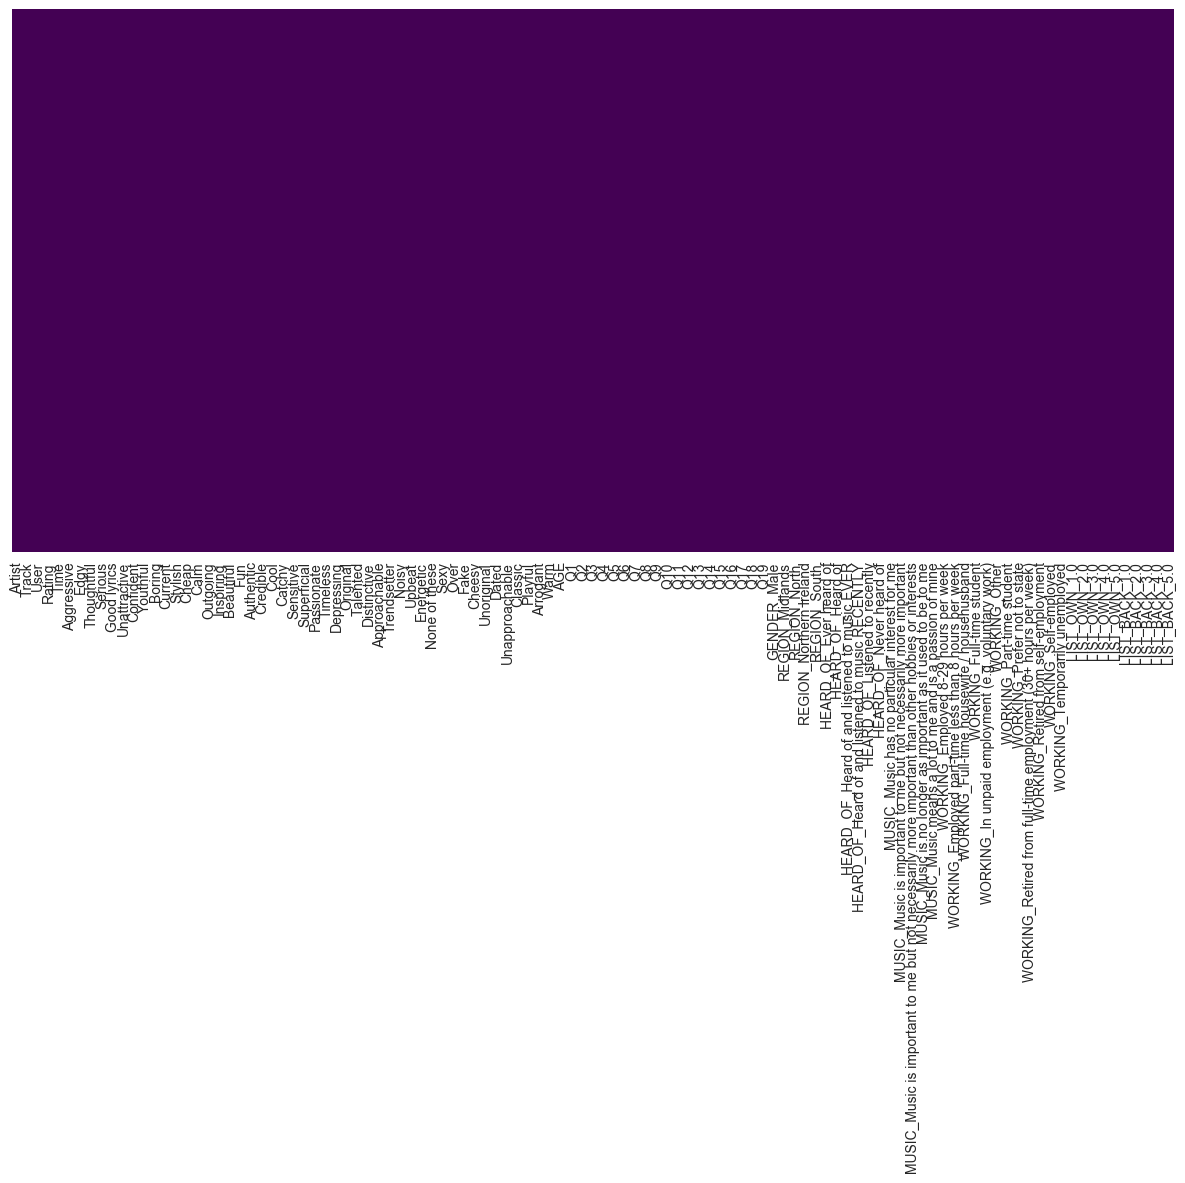

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(data_clean.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [29]:
data_clean.to_csv(path_or_buf='/Users/johnsnyder/GA-DSI-working/Capstone/EMI/clean_data_mean_imputes.csv')

## Data problem, and solution, explained
Originally, there were a slew of null values in the dataset. Due to some mismatches in the dataset - for example, some interviews gave a different list of words to respondents, and some respondent ID numbers do not match up with ID numbers in the training data set - if we simply drop any rows with null values, we lose the *entire* data set. In other words, every row of data contains at least one null value. I categorized the 82 words given in the 'words.csv' file into 11 categories, removed some columns with too many null values, and chiseled down the dataset to have no null values. Without categorizing the words.csv file, the dataset goes from about 188,000 rows of data to 37,000. Ouch. By categorizing the words, and dropping some of the questionnaire elements, we retain nearly 111,500 datapoints. Obviously this is a still a major reduction from what we originally had, but is a major improvement from before!

Let's quickly take a closer look at what values have been lost through data cleaning and mismatches in the dataset...

In [31]:
# Comparing number of unique users in the "users.csv" file compared to unique users in the "words.csv" file.
lstU = users.User.unique()
lstW = words.User.unique()
user_test = []
for x in lstW:
    if x in lstU:
        pass
    else:
        user_test.append(x)
        
print "Difference in total unique users between Users and Words datasets: ", len(user_test)
print "Users (users.csv): ", len(lstU)
print "Users (words.csv): ", len(lstW)

Difference in total unique users between Users and Words datasets:  2283
Users (users.csv):  48645
Users (words.csv):  50928


In [32]:
# Comparing number of unique artists in the "users.csv" file compared to unique artists in the "train.csv" file.
ArtW = words.Artist.unique()
ArtT = train.Artist.unique()
art_test = []
for x in ArtW:
    if x in ArtT:
        pass
    else:
        art_test.append(x)
        
print "Total unique artists lost: ", len(art_test)
print "Artists (words.csv): ", len(ArtW)
print "Artists (train.csv): ", len(ArtT)

Total unique artists lost:  0
Artists (words.csv):  50
Artists (train.csv):  50


In [33]:
# Looking into the values we dropped due to missing necessary values
null_data = data_drop[data_drop.isnull().any(axis=1)]
print null_data.shape
null_data.head()

(0, 109)


,Artist,Track,User,Rating,Time,Aggressive,Edgy,Thoughtful,Serious,Good lyrics,...,LIST_OWN_1.0,LIST_OWN_2.0,LIST_OWN_3.0,LIST_OWN_4.0,LIST_OWN_5.0,LIST_BACK_1.0,LIST_BACK_2.0,LIST_BACK_3.0,LIST_BACK_4.0,LIST_BACK_5.0


In [38]:
print "Total number of unique users: {:,}".format(pd.concat((users.User, words.User, train.User), axis = 0).nunique())
print "Total number of unique users (respondent background info): {:,}".format(users.User.nunique())
print "Total number of unique users after data clean: {:,}".format(data_clean.User.nunique())
print "% of original users remaining: {0:.2f}%".format(100*float(data_clean.User.nunique()) /\
                                        pd.concat((users.User, words.User, train.User), axis = 0).nunique())

Total number of unique users: 50,928
Total number of unique users (respondent background info): 48,645
Total number of unique users after data clean: 49,479
% of original users remaining: 97.15%


## OK, so...

The above check shows that zero artists and about only 2.85% of users were removed through the process of removing null values to obtain a clean dataset.

Given the alternative method of cleaning this dataset through categorized words.csv, this is very good.